<a href="https://colab.research.google.com/github/anoopjakob/ML_Lab_assignment_4/blob/main/ML_Lab_assignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

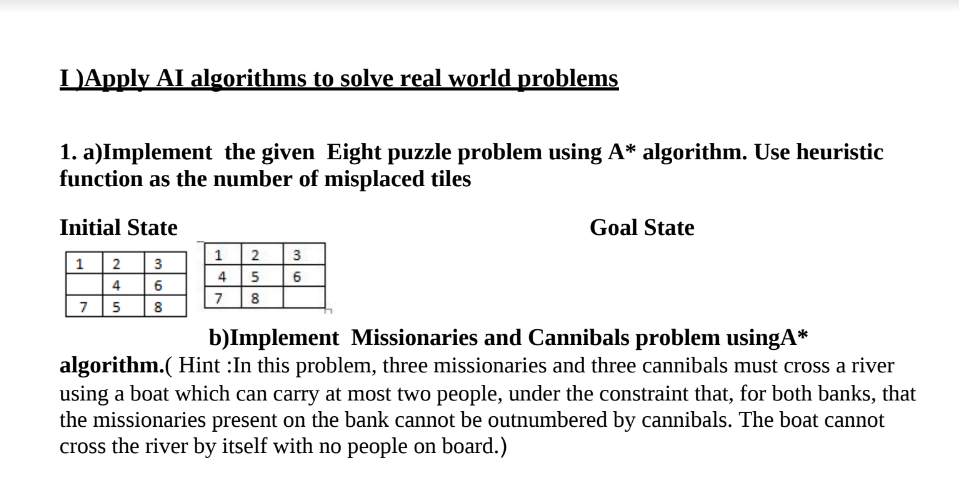

**solution**

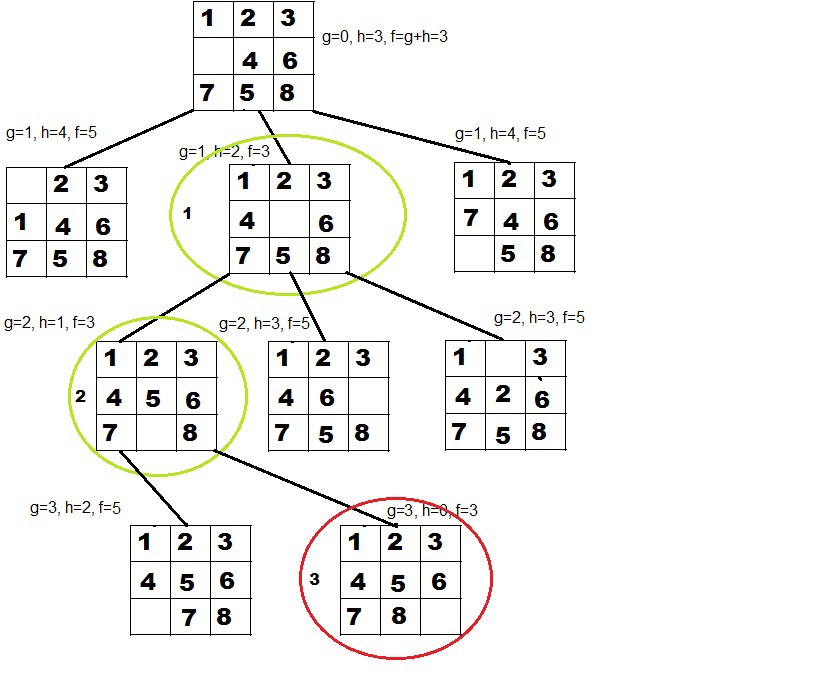

In [ ]:
import numpy as np

In [ ]:
# to store the movement of space on all the 9 positions
value_dict = {
    0 : [1,3],
    1 : [0,2,4],
    2 : [1,5],
    3 : [0,4,6],
    4 : [1,3,5,7],
    5 : [2,4,8],
    6 : [3,7],
    7 : [4,6,8],
    8 : [5,7]
}

In [ ]:
# function to exchange the values according to zero space
def exchange(array,index1, index2):
  temp_array = array
  temp = temp_array[index1]
  temp_array[index1] = temp_array[index2]
  temp_array[index2] = temp
  return temp_array


# function to create the children 
def create_children(data):
  List = data.tolist()
  # find the position of empy space
  index_of_zero = List.index(0)
  print('index of zero : ', index_of_zero)
  exchange_index_list = value_dict[index_of_zero]
  print('exchange index list :', exchange_index_list)
  children_lists=[]
  # temp_list= List
 
  for i in range(len(exchange_index_list)):
    temp_list = List[:]
    new_list = exchange(temp_list, exchange_index_list[i], index_of_zero)
    children_lists.append(new_list)
  # print('total children list:', children_lists)
  return children_lists


def no_of_misplaced_tiles(current_data, goal_state_data):
  count = 0
  for i in range(9):
    
    if current_data[i] != goal_state_data[i] and current_data[i] != 0:
      count+=1
  # c = np.array(current_data)
  # g = np.array(goal_state_data)
  # misplaced = c-g
  # # no of misplaced tiles 
  # count=0
  # for i in misplaced:
  #   if i !=0:
  #     count=count+1
  return count


def best_child(list_of_lists, goal_state_data, best_children_list,node):
  cost = 200 # assigning a big value 
  
  for children in list_of_lists:
    x = no_of_misplaced_tiles(children, goal_state_data)
  
    # print('best children list', best_children_list)
    
    if x + node < cost:
      heuristic_value = x
      cost = x + node
      best_c = children 
  
        # best_children_list = best_children_list.append(best_children)
        # best_children = children.extend(node)
    
  return heuristic_value,cost, best_c

def print_as_matrix(data):
  array1 = np.array(data).reshape(3,3)
  return array1

In [ ]:
 node_level = 0

start_state = np.array([1,0,3,4,2,5,7,8,6])
# start_state = np.array([3,4,1,2,5,6,7,0,8])
goal_state  = np.array([1,2,3,4,5,6,7,8,0])
previous_state=[]
all_children_database = []

current_state = start_state
best_children_list = start_state
for i in range(10):
  x = no_of_misplaced_tiles(current_state, goal_state)
  if x != 0:
    # find childrens of current state
    print('Node_level: ', node_level)
    children = create_children(current_state)
    

    all_children_database += children
    # print('all children: ', all_children_database)
    h, cost, best_children = best_child(children, goal_state, best_children_list , node_level)
    # print('heruistic value: ', h)
    for i in range(len(children)):
      print('{}   h_value : {} \n'.format(print_as_matrix(children[i]), no_of_misplaced_tiles(children[i], goal_state)))
    
    
    print('\n\n best children : \n {},   cost {} \n\n'.format(print_as_matrix(best_children), cost))

    print('----------- -------- --------')
    node_level +=1
    current_state = np.array(best_children)
  else:
    print('*goal reached*', current_state)
    break

Node_level:  0
index of zero :  1
exchange index list : [0, 2, 4]
[[0 1 3]
 [4 2 5]
 [7 8 6]]   h_value : 4 

[[1 3 0]
 [4 2 5]
 [7 8 6]]   h_value : 4 

[[1 2 3]
 [4 0 5]
 [7 8 6]]   h_value : 2 



 best children : 
 [[1 2 3]
 [4 0 5]
 [7 8 6]],   cost 2 


----------- -------- --------
Node_level:  1
index of zero :  4
exchange index list : [1, 3, 5, 7]
[[1 0 3]
 [4 2 5]
 [7 8 6]]   h_value : 3 

[[1 2 3]
 [0 4 5]
 [7 8 6]]   h_value : 3 

[[1 2 3]
 [4 5 0]
 [7 8 6]]   h_value : 1 

[[1 2 3]
 [4 8 5]
 [7 0 6]]   h_value : 3 



 best children : 
 [[1 2 3]
 [4 5 0]
 [7 8 6]],   cost 2 


----------- -------- --------
Node_level:  2
index of zero :  5
exchange index list : [2, 4, 8]
[[1 2 0]
 [4 5 3]
 [7 8 6]]   h_value : 2 

[[1 2 3]
 [4 0 5]
 [7 8 6]]   h_value : 2 

[[1 2 3]
 [4 5 6]
 [7 8 0]]   h_value : 0 



 best children : 
 [[1 2 3]
 [4 5 6]
 [7 8 0]],   cost 2 


----------- -------- --------
*goal reached* [1 2 3 4 5 6 7 8 0]


**Part(b)** Missionaries and Cannibals crossing the river







In [269]:


# five possible operations?
# 1. canoe takes 1 Missionary across the river (1M)
# 1. canoe takes 1 Cannibal across the river (1C)
# 1. canoe takes 2 Missionaries across the river (2M)
# 1. canoe takes 1 Cannibal across the river (2C)
# 1. canoe takes 1 Cannibal and 1 Missionary  across the river (1M1C)

N=3
M=2
class Node:
    def __init__(self, info):  # initialization node's properties
        self.info = info
        self.h = (info[0] + info[1]) / (M)

class Problem_Data:
    # initialize the problem data
    def __init__(self):
        # Node(N, N, 0) = 3 missionaries, 3 cannibals, the boat is going to the right bank;
        # Node(0, 0, 1) = 0 missionaries, 0 cannibals, the boat is going to the left bank bank.
        self.nodes = [Node((N, N, 0)), Node((0, 0, 1))]
        self.start_node = self.nodes[0]     # Node type object
        self.goal_node = self.nodes[1].info  # --- without h


### A* classes
class CurrentNode:
    problem = None

    def __init__(self, graph_node, parent=None, g=0, f=None):
        # initialization of the current node's properties
        self.graph_node = graph_node  # Node object
        self.parent = parent		# Node object
        self.g = g					# A* function = cost of the path: root -> current node
        if f is None:
            self.f = self.g + self.graph_node.h  # FORMULA FROM A* ALGORITHM
        else:
            self.f = f

    def tree_path(self):   # find the path from current node to root
       
        current_node = self  # current node
        path = [current_node]

        while current_node.parent is not None:
            path = [current_node.parent] + path  
            current_node = current_node.parent  
        return path

    def expand(self):# find all the current node's successors
        successors = []  # LIST
        missionary_start_bank, cannibal_start_bank, boat = self.graph_node.info
        missionary_destination_bank, cannibal_destination_bank = N - missionary_start_bank, N - cannibal_start_bank

        for missionary_transport in range(M + 1):
            for cannibal_transport in range(M + 1):
                # the capacity of the boat can't be exceeded
                if missionary_transport + cannibal_transport > M:
                    continue
                # the boat must not be empty
                if missionary_transport + cannibal_transport == 0:
                    continue
                # missionaries must be >= cannibals
                if missionary_transport and cannibal_transport > missionary_transport:
                    continue

             # if the boat is leaving the left bank to go to right bank
                if boat == 0:
                    # update the number of missionaries and cannibals on the left and on the right bank
                    new_missionary_start_bank = missionary_start_bank - missionary_transport
                    new_cannibal_start_bank = cannibal_start_bank - cannibal_transport
                    new_missionary_destination_bank = missionary_destination_bank + missionary_transport
                    new_cannibal_destination_bank = cannibal_destination_bank + cannibal_transport
                else:  # if the boat is leaving the right bank to go to left bank
                    # update the number of missionaries and cannibals on the left and on the right bank
                    new_missionary_start_bank = missionary_start_bank + missionary_transport
                    new_cannibal_start_bank = cannibal_start_bank + cannibal_transport
                    new_missionary_destination_bank = missionary_destination_bank - missionary_transport
                    new_cannibal_destination_bank = cannibal_destination_bank - cannibal_transport

                if new_missionary_start_bank and new_cannibal_start_bank > new_missionary_start_bank:
                    # If there are missionaries on the bank after you have made a transport and the number of cannibals on the left bank is is higher than the number of missionaries there
                    # Then do not consider this variant
                    continue

                if new_missionary_destination_bank and new_cannibal_destination_bank > new_missionary_destination_bank:
                    # If there are missionaries on the bank after you have made a transport and the number of cannibals on the right bank is is higher than the number of missionaries there
                    # Then do not consider this variant
                    continue

                new_info = (new_missionary_start_bank,
                            new_cannibal_start_bank, 1 - boat)

                successors.append((Node(new_info), 1))

        return successors

    def check_goal_node(self):
        return self.graph_node.info == self.problem.goal_node

    def __str__(self):
        parent = self.parent if self.parent is None else self.parent.graph_node.info
        return f"\n--> : {self.graph_node.info}, previous : {parent}, h={self.graph_node.h}, g={self.g}, f={self.f}"


def DisplayInfoNodes(l):# display node's information
    s = " "
    for x in l:
        s += str(x) + "  "
    s += " "
    return s

def in_list(List, node):# check if the node is in List

    for i in range(len(List)):
        if List[i].graph_node.info == node.info:
            return List[i]
    return None


def A_star_algorithm():
    # find the cheapest path from root (initial configuration) to goal node (final configuration).
    root = CurrentNode(CurrentNode.problem.start_node)
    open = [root]		# discovered nodes that have not been expanded yet!!
    closed = []			# discovered and expanded nodes
    # both lists contain CurrentNode type objects

    while open:  # while we have discovered nodes
        # remove the node from open
        current_node = open.pop(0)
    # add the node in closed
        closed.append(current_node)

        if current_node.check_goal_node():  # we found the final configuration
            break

        path = current_node.tree_path()

        for succesor, cost in current_node.expand():
            if in_list(path, succesor):
                continue

            # search the open_node in open list
            open_node = in_list(open, succesor)
            # search the closed_node in closed list
            closed_node = in_list(closed, succesor)

            g_new = current_node.g + cost  # = distance to successor

            if open_node:  # if the open_node is in open list
                # if we found a better distance => UPDATE
                if g_new < open_node.g:
                    open_node.g = g_new
                    open_node.f = g_new + open_node.graph_node.h
                    open_node.parent = current_node

            elif closed_node:  # if the closed_node is in closed list => calculate f
                f_new = g_new + closed_node.graph_node.h
                # if we found a better distance => UPDATE
                if f_new < closed_node.f:
                    closed_node.g = g_new
                    closed_node.f = f_new + closed_node.graph_node.h
                    closed_node.parent = current_node
                    # MOVE the node in open list to expand again when is necessary
                    open.append(closed_node)
            else:
                # the node is neither in open nor in closed => create e new node and add it to open list
                new_node = CurrentNode(
                    graph_node=succesor, parent=current_node, g=g_new)

                open.append(new_node)
        # sort by the value of function => always pop the minimum
        open.sort(key=lambda node: node.f)


    if(len(open) == 0):
        print("\nOpen list is empty, no path from start node to goal node")
    else:
        print("\nPath with minimum cost: " +
              DisplayInfoNodes(current_node.tree_path()))


if __name__ == "__main__":
    problem = Problem_Data()
    CurrentNode.problem = problem
    A_star_algorithm()



Path with minimum cost:  
--> : (3, 3, 0), previous : None, h=3.0, g=0, f=3.0  
--> : (3, 1, 1), previous : (3, 3, 0), h=2.0, g=1, f=3.0  
--> : (3, 2, 0), previous : (3, 1, 1), h=2.5, g=2, f=4.5  
--> : (3, 0, 1), previous : (3, 2, 0), h=1.5, g=3, f=4.5  
--> : (3, 1, 0), previous : (3, 0, 1), h=2.0, g=4, f=6.0  
--> : (1, 1, 1), previous : (3, 1, 0), h=1.0, g=5, f=6.0  
--> : (2, 2, 0), previous : (1, 1, 1), h=2.0, g=6, f=8.0  
--> : (0, 2, 1), previous : (2, 2, 0), h=1.0, g=7, f=8.0  
--> : (0, 3, 0), previous : (0, 2, 1), h=1.5, g=8, f=9.5  
--> : (0, 1, 1), previous : (0, 3, 0), h=0.5, g=9, f=9.5  
--> : (0, 2, 0), previous : (0, 1, 1), h=1.0, g=10, f=11.0  
--> : (0, 0, 1), previous : (0, 2, 0), h=0.0, g=11, f=11.0   


In [293]:
import sys
import copy

start = [3, 3, 1]
size = 3

possible_actions = [[1, 0, 1], [2, 0, 1], [0, 1, 1], [0, 2, 1], [1, 1, 1]]

memo = []
solution = 0

def substract(vector1, vector2):
    return [vector1[i] - vector2[i] for i in range(3)]


def add(vector1, vector2):
    return [vector1[i] + vector2[i] for i in range(3)]


def valid_add(vector):
    actions = []
    for action in possible_actions:
        added = add(vector, action)
        other = substract([size, size, 1], added)
        if added[0] >= 0 and added[1] >= 0 and added[0] <= size and added[1] <= size and (added[0] >= added[1] or added[0] == 0) and (other[0] >= other[1] or other[0] == 0):
            actions.append(action)

    return actions


def valid_substract(vector):
    actions = []
    for action in possible_actions:
        substracted = substract(vector, action)
        other = substract([size, size, 1], substracted)
        if substracted[0] >= 0 and substracted[1] >= 0 and substracted[0] <= size and substracted[1] <= size and (substracted[0] >= substracted[1] or substracted[0] == 0) and (other[0] >= other[1] or other[0] == 0):
            actions.append(action)

    return actions


def solve(vector, moves, print_steps):
    global solution

    if vector in memo:
        return
    else:
        memo.append(vector)

    moves = copy.deepcopy(moves)
    moves += 1

    if vector[2] == 0:
        actions = valid_add(vector)
    else:
        actions = valid_substract(vector)

    for action in actions:
        new_vector = copy.deepcopy(vector)
        for i in range(3):
            if new_vector[2] == 0:
                new_vector[i] += action[i]
            else:
                new_vector[i] -= action[i]

        if sum(new_vector) == 0:
            if print_steps:
                print(moves, new_vector)
            solution = moves
            return True

        if solve(new_vector, moves, print_steps):
            if print_steps:
                print(moves, new_vector)
            return True

    return False

solve(start, 0, True)

print(solution)

11 [0, 0, 0]
10 [1, 1, 1]
9 [0, 1, 0]
8 [0, 3, 1]
7 [0, 2, 0]
6 [2, 2, 1]
5 [1, 1, 0]
4 [3, 1, 1]
3 [3, 0, 0]
2 [3, 2, 1]
1 [3, 1, 0]
11
